<a href="https://colab.research.google.com/github/jjwjjwjjwjjwjjw/Recommender-System/blob/main/2.%20MovieLens_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%81%ED%99%94_%EA%B8%B0%EB%B3%B8%EC%A0%95%EB%B3%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MovieLens 데이터 불러오기

In [ ]:
# Google colab 사용할 때, 변경하기
path = '/content/drive/MyDrive/data/ml-latest-small/'
os.listdir(path)

['links.csv', 'tags.csv', 'movies.csv', 'ratings.csv', 'README.txt']

In [ ]:
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [ ]:
print(ratings_df.shape)
print(movies_df.shape)

(100836, 3)
(9742, 2)


### 장르 분석하기

* 전체 장르 파악하기

In [ ]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [ ]:
print(all_genres)

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'], ['Adventure', 'Children', 'Fantasy'], ['Comedy', 'Romance'], ['Comedy', 'Drama', 'Romance'], ['Comedy'], ['Action', 'Crime', 'Thriller'], ['Comedy', 'Romance'], ['Adventure', 'Children'], ['Action'], ['Action', 'Adventure', 'Thriller'], ['Comedy', 'Drama', 'Romance'], ['Comedy', 'Horror'], ['Adventure', 'Animation', 'Children'], ['Drama'], ['Action', 'Adventure', 'Romance'], ['Crime', 'Drama'], ['Drama', 'Romance'], ['Comedy'], ['Comedy'], ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'], ['Comedy', 'Crime', 'Thriller'], ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'], ['Action', 'Crime', 'Thriller'], ['Drama', 'Sci-Fi'], ['Drama', 'Romance'], ['Drama'], ['Children', 'Drama'], ['Drama', 'Romance'], ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'], ['Crime', 'Drama'], ['Drama'], ['Mystery', 'Sci-Fi', 'Thriller'], ['Children', 'Drama'], ['Crime', 'Drama'], ['Children', 'Comedy'], ['Comedy', 'Romance'], ['Drama'], [

In [ ]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Western', '(no genres listed)', 'Thriller', 'Fantasy', 'Action', 'Documentary', 'Comedy', 'Drama', 'IMAX', 'Mystery', 'Horror', 'Adventure', 'Crime', 'Sci-Fi', 'Romance', 'War', 'Children', 'Animation', 'Musical', 'Film-Noir']


In [ ]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Western,(no genres listed),Thriller,Fantasy,Action,Documentary,Comedy,Drama,IMAX,Mystery,Horror,Adventure,Crime,Sci-Fi,Romance,War,Children,Animation,Musical,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ct = 0
for i, row in genres_df.iterrows():
    movie_id = row.name
    list_of_genres = movies_df.loc[movie_id]['genres'].split('|')

    genres_df.loc[movie_id][list_of_genres] = 1

In [ ]:
genres_df.head()

,Western,(no genres listed),Thriller,Fantasy,Action,Documentary,Comedy,Drama,IMAX,Mystery,Horror,Adventure,Crime,Sci-Fi,Romance,War,Children,Animation,Musical,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN
2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)
print(genres_df.shape)
print(genres_df)

(9742, 21)
         Western  (no genres listed)  Thriller  Fantasy  Action  Documentary  \
movieId                                                                        
1              0                   0         0        1       0            0   
2              0                   0         0        1       0            0   
3              0                   0         0        0       0            0   
4              0                   0         0        0       0            0   
5              0                   0         0        0       0            0   
...          ...                 ...       ...      ...     ...          ...   
193581         0                   0         0        1       1            0   
193583         0                   0         0        1       0            0   
193585         0                   0         0        0       0            0   
193587         0                   0         0        0       1            0   
193609         0             

* get_dummies 활용하기

In [ ]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_df.drop('genres', axis =1, inplace=True)

In [ ]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 특정 장르의 평점과 user 분석

In [ ]:
movies_df.columns

Index(['title', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list.index


Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [ ]:
movies_df['title'][movies_df.Animation == 1]

movieId
1                                          Toy Story (1995)
13                                             Balto (1995)
48                                        Pocahontas (1995)
239                                   Goofy Movie, A (1995)
313                               Swan Princess, The (1994)
                                ...                        
193567    anohana: The Flower We Saw That Day - The Movi...
193573              Love Live! The School Idol Movie (2015)
193581            Black Butler: Book of the Atlantic (2017)
193583                         No Game No Life: Zero (2017)
193587                  Bungo Stray Dogs: Dead Apple (2018)
Name: title, Length: 611, dtype: object

In [ ]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,596,5.0,964982838
1,661,5.0,964982838
1,673,3.0,964981775
1,1023,5.0,964982681
...,...,...,...
610,146309,4.0,1493850187
610,149406,3.5,1479542295
610,152081,4.0,1493846503


In [ ]:
# user는 animation장르의 영화에 대해 다음과 같은 평점을 부여
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

### 장르간 상관관계

In [ ]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


<Axes: >

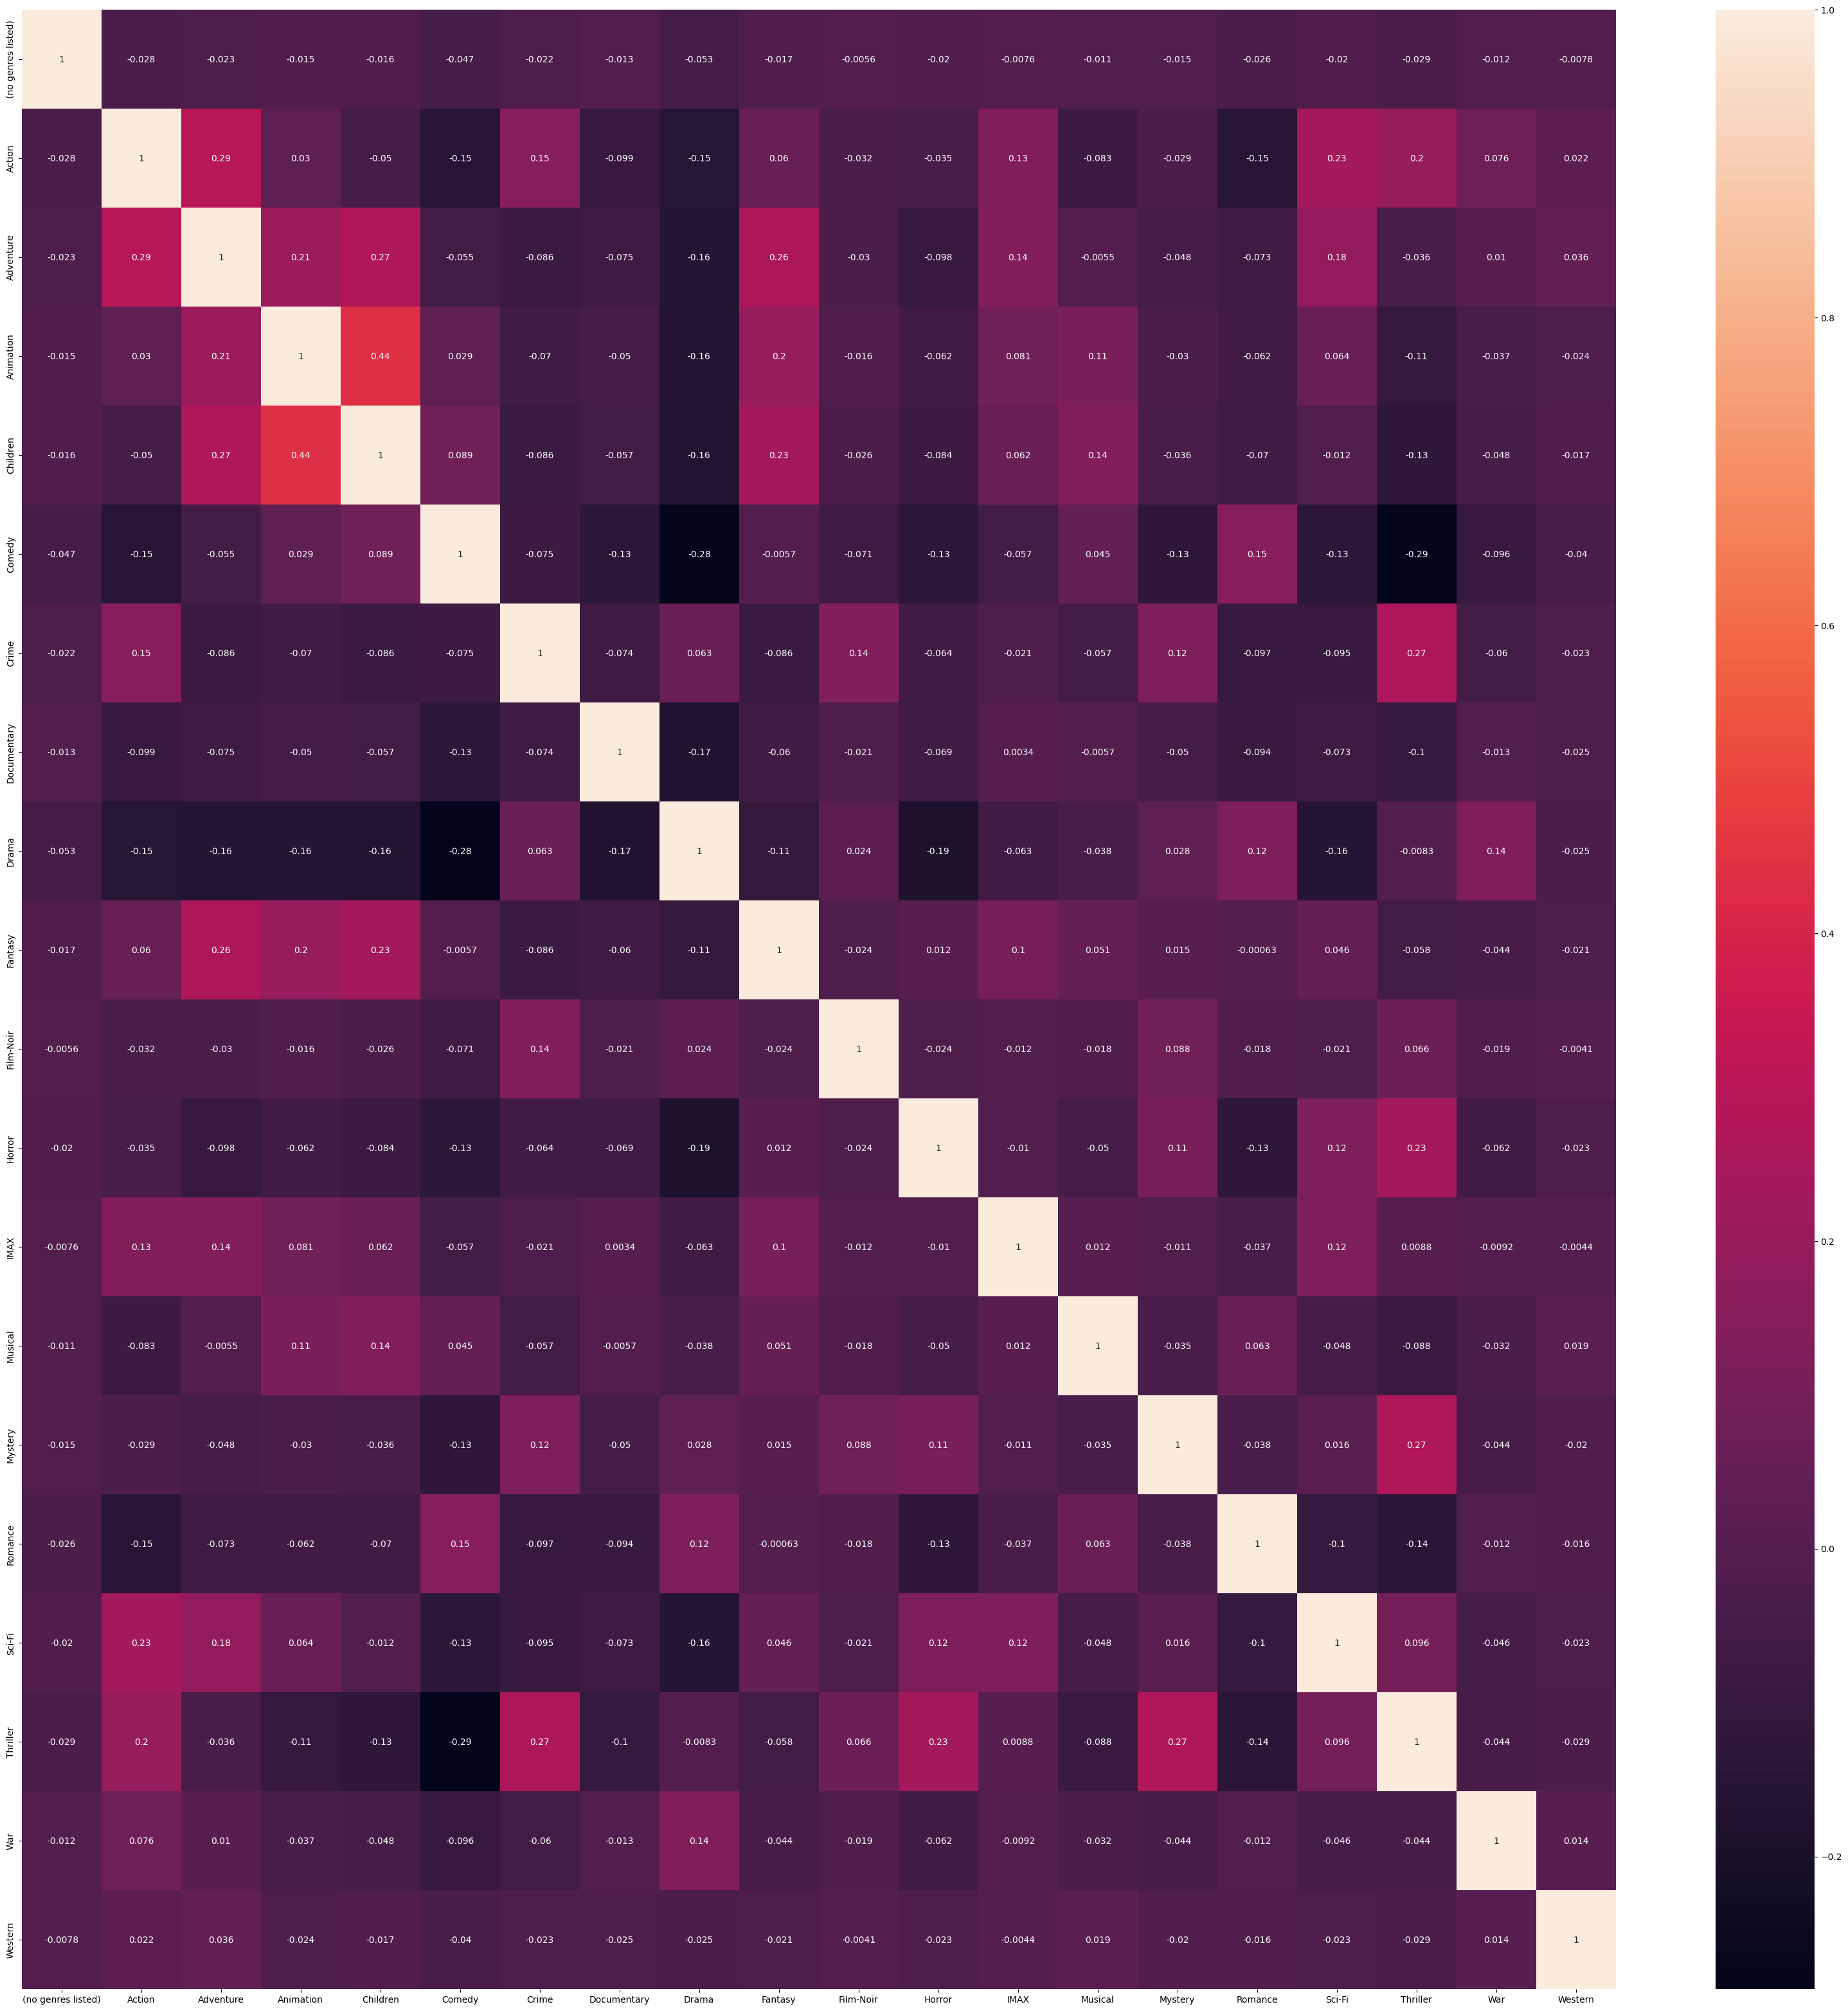

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

### 영화 이름, 연도 분석

In [ ]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
title_df = movies_df.copy()
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Python Regular Expression, 정규식표현 -> 문자열에서 규칙을 정의, 규칙과 일치하는 부분을 추출해내는 방법
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,(1995)
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,(1995)
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)


* 혹시 연도가 제대로 표시가 안되어있는 영화도 있을 수 있으니 nan 확인

In [ ]:
title_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64

In [ ]:
title_df[title_df['year'].isnull()]

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
40697,Babylon 5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
140956,Ready Player One,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,NaN
143410,Hyena Road,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
149334,Nocturnal Animals,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,NaN
156605,Paterson,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
162414,Moonlight,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
167570,The OA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
171495,Cosmos,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# 연도가 없는 영화 또는 (no genres listed)라고 표시된 영화는 드랍할 수 있다.
title_df[title_df['(no genres listed)'] == 1].shape

(34, 22)

In [ ]:
title_df.dropna(axis=0, inplace=True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


### 연도별 영화 데이터 분석

In [ ]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [ ]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: title, Length: 106, dtype: int64

In [ ]:
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

### 영화와 개봉연도, 그리고 평점

In [ ]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
title_df

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
193585,Flint (2017),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017


In [ ]:
title_df[title_df['year'] == '2017']

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
122898,Justice League (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122906,Black Panther (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122916,Thor: Ragnarok (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122918,Guardians of the Galaxy 2 (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190215,Liquid Truth (2017),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
191005,Gintama (2017),0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017


In [ ]:
# 2017년 영화 평점 평균
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == '2017'].index)].mean()

3.5780911062906724

In [ ]:
len(title_df['year'].unique())

106

In [ ]:
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
    results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns=['year','avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
...,...,...
100,2014,3.512879
101,2015,3.410386
102,2016,3.387261
103,2017,3.578091


array([[<Axes: title={'center': 'avg_ratings'}>]], dtype=object)

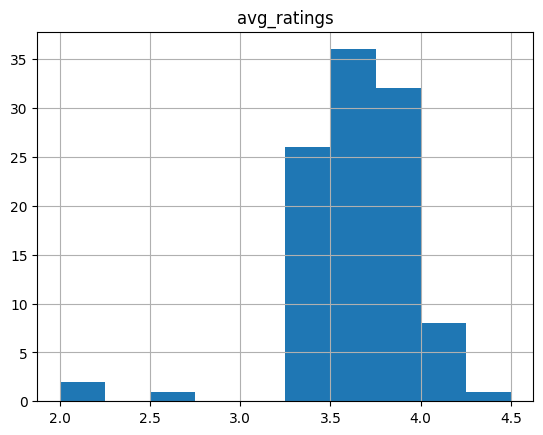

In [ ]:
result_df.hist()